In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:\\Me__ee\\ai course\\machine project\\machine learning project 2\\diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df=df.drop('HbA1c_level',axis=1)
#it causes data leakage

In [5]:
df = df[df['smoking_history'] != 'No Info']
df['smoking_history'].value_counts()

smoking_history
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [6]:
df['smoking_history'] = df['smoking_history'].replace("ever", "never")

In [7]:
df['smoking_history'].value_counts()

smoking_history
never          39099
former          9352
current         9286
not current     6447
Name: count, dtype: int64

In [8]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,140,0
2,Male,28.0,0,0,never,27.32,158,0
3,Female,36.0,0,0,current,23.45,155,0
4,Male,76.0,1,1,current,20.14,155,0
5,Female,20.0,0,0,never,27.32,85,0


In [9]:
df = pd.get_dummies(df, columns=['smoking_history'])


In [10]:
df = pd.get_dummies(df, columns=['gender'])

In [11]:
df = df.astype(int)

In [12]:
df.head()


,age,hypertension,heart_disease,bmi,blood_glucose_level,diabetes,smoking_history_current,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
0,80,0,1,25,140,0,0,0,1,0,1,0,0
2,28,0,0,27,158,0,0,0,1,0,0,1,0
3,36,0,0,23,155,0,1,0,0,0,1,0,0
4,76,1,1,20,155,0,1,0,0,0,0,1,0
5,20,0,0,27,85,0,0,0,1,0,1,0,0


In [13]:
X=df.drop('diabetes',axis=1)
y=df['diabetes']

In [14]:
X

,age,hypertension,heart_disease,bmi,blood_glucose_level,smoking_history_current,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
0,80,0,1,25,140,0,0,1,0,1,0,0
2,28,0,0,27,158,0,0,1,0,0,1,0
3,36,0,0,23,155,1,0,0,0,1,0,0
4,76,1,1,20,155,1,0,0,0,0,1,0
5,20,0,0,27,85,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99992,26,0,0,34,160,0,0,1,0,1,0,0
99993,40,0,0,40,155,0,0,1,0,1,0,0
99997,66,0,0,27,155,0,1,0,0,0,1,0
99998,24,0,0,35,100,0,0,1,0,1,0,0


In [15]:
y

0        0
2        0
3        0
4        0
5        0
        ..
99992    0
99993    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 64184, dtype: int32

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming you have your data in X (features)

# Min-Max Scaling
scaler = MinMaxScaler(feature_range=(0, 1))  # Set range to 0-1
scaled_data = scaler.fit_transform(X)  # Fit and transform the data

# Standardization
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(X)

In [17]:
scaled_data

array([[1.    , 0.    , 1.    , ..., 1.    , 0.    , 0.    ],
       [0.35  , 0.    , 0.    , ..., 0.    , 1.    , 0.    ],
       [0.45  , 0.    , 0.    , ..., 1.    , 0.    , 0.    ],
       ...,
       [0.825 , 0.    , 0.    , ..., 0.    , 1.    , 0.    ],
       [0.3   , 0.    , 0.    , ..., 1.    , 0.    , 0.    ],
       [0.7125, 0.    , 0.    , ..., 1.    , 0.    , 0.    ]])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = tf.keras.Sequential([
    
  layers.Dense(16, activation="relu"),
  layers.Dense(8, activation="relu"),
  layers.Dense(1, activation="sigmoid") 
])

In [20]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])

In [21]:
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.8818 - loss: 0.4820
Epoch 2/50
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - accuracy: 0.8897 - loss: 0.2943
Epoch 3/50
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step - accuracy: 0.9082 - loss: 0.2307
Epoch 4/50
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step - accuracy: 0.9198 - loss: 0.2149
Epoch 5/50
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - accuracy: 0.9236 - loss: 0.2037
Epoch 6/50
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - accuracy: 0.9244 - loss: 0.2026
Epoch 7/50
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step - accuracy: 0.9228 - loss: 0.2098
Epoch 8/50
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step - accuracy: 0.9217 - loss: 0.2075
Epoch 9/50
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step - accuracy: 0.9226 - loss: 0.2047
Epoch 10/50
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - accuracy: 0.9259 - loss: 0.2005
Epoch 11/50
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 1s 469us/step - accuracy: 0.9247 - loss: 0.2074
Epoch 12

In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.9229 - loss: 0.2020
Test Accuracy: 0.9252


In [23]:
model.evaluate(X_test,y_test)

402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.9229 - loss: 0.2020


[0.19772353768348694, 0.9252161979675293]

402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
Confusion Matrix:
 [[11297   118]
 [  842   580]]


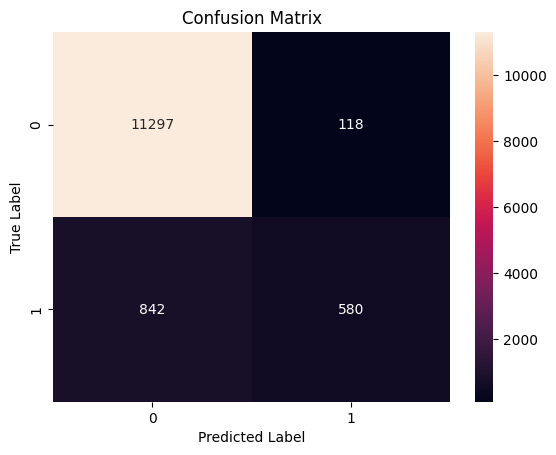

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, log_loss
import matplotlib.pyplot as plt
import seaborn as sns  # Optional for nicer visualization

# Sample data (replace with your actual data)
y_true = y_test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int) 

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix (optional)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix (using seaborn for better aesthetics)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [26]:
# Compute precision, recall, f1-score
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)
# Compute Log Loss
ll = log_loss(y_test, y_pred)
print("Log Loss: ", ll)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     11415
           1       0.83      0.41      0.55      1422

    accuracy                           0.93     12837
   macro avg       0.88      0.70      0.75     12837
weighted avg       0.92      0.93      0.91     12837

Log Loss:  2.695482375442274


In [27]:
import joblib
joblib.dump(model, 'nn_final_model.joblib')


['nn_final_model.joblib']

In [28]:
loaded_model = joblib.load('nn_final_model.joblib')

In [29]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd

# Define the predict function
def predict():
    # Read input values
    age = float(age_entry.get())
    hypertension = int(hypertension_entry.get())
    heart_disease = int(heart_disease_entry.get())
    bmi = float(bmi_entry.get())
    blood_glucose_level = float(blood_glucose_level_entry.get())
    smoking_history_current = int(smoking_history_current_entry.get())
    smoking_history_former = int(smoking_history_former_entry.get())
    smoking_history_never = int(smoking_history_never_entry.get())
    smoking_history_not_current = int(smoking_history_not_current_entry.get())
    gender = gender_entry.get()

    # Create DataFrame with user inputs
    user_data = pd.DataFrame({
        'age': [age],
        'hypertension': [hypertension],
        'heart_disease': [heart_disease],
        'bmi': [bmi],
        'blood_glucose_level': [blood_glucose_level],
        'smoking_history_current': [smoking_history_current],
        'smoking_history_former': [smoking_history_former],
        'smoking_history_never': [smoking_history_never],
        'smoking_history_not current': [smoking_history_not_current],
        'gender_Female': [1 if gender == 'Female' else 0],
        'gender_Male': [1 if gender == 'Male' else 0],
        'gender_Other': [1 if gender == 'Other' else 0]
    })

    # Predict using the loaded model
    prediction = loaded_model.predict(user_data)
    print(prediction[0])
    pred=prediction[0]
           # Show the predicted class
    if pred == 1 :
        textres=" You may have Diabetes,Please check your Doctor!!!."
    else :
        textres="Your numbers are fine , but checking your Doctor may be usefull ."
    messagebox.showinfo("Prediction Result", f"The predicted class is: {pred}\n{textres}")
# Create GUI
root = tk.Tk()
root.title("Health Prediction")

# Labels
tk.Label(root, text="Age:").grid(row=0, column=0, padx=5, pady=5, sticky="e")
tk.Label(root, text="Hypertension:").grid(row=1, column=0, padx=5, pady=5, sticky="e")
tk.Label(root, text="Heart Disease:").grid(row=2, column=0, padx=5, pady=5, sticky="e")
tk.Label(root, text="BMI:").grid(row=3, column=0, padx=5, pady=5, sticky="e")
tk.Label(root, text="Blood Glucose Level:").grid(row=5, column=0, padx=5, pady=5, sticky="e")
tk.Label(root, text="Smoking History Current:").grid(row=6, column=0, padx=5, pady=5, sticky="e")
tk.Label(root, text="Smoking History Former:").grid(row=7, column=0, padx=5, pady=5, sticky="e")
tk.Label(root, text="Smoking History Never:").grid(row=8, column=0, padx=5, pady=5, sticky="e")
tk.Label(root, text="Smoking History Not Current:").grid(row=9, column=0, padx=5, pady=5, sticky="e")
tk.Label(root, text="Gender:").grid(row=10, column=0, padx=5, pady=5, sticky="e")

# Entries
age_entry = tk.Entry(root)
age_entry.grid(row=0, column=1, padx=5, pady=5)

hypertension_entry = tk.Entry(root)
hypertension_entry.grid(row=1, column=1, padx=5, pady=5)

heart_disease_entry = tk.Entry(root)
heart_disease_entry.grid(row=2, column=1, padx=5, pady=5)

bmi_entry = tk.Entry(root)
bmi_entry.grid(row=3, column=1, padx=5, pady=5)

blood_glucose_level_entry = tk.Entry(root)
blood_glucose_level_entry.grid(row=5, column=1, padx=5, pady=5)

smoking_history_current_entry = tk.Entry(root)
smoking_history_current_entry.grid(row=6, column=1, padx=5, pady=5)

smoking_history_former_entry = tk.Entry(root)
smoking_history_former_entry.grid(row=7, column=1, padx=5, pady=5)

smoking_history_never_entry = tk.Entry(root)
smoking_history_never_entry.grid(row=8, column=1, padx=5, pady=5)

smoking_history_not_current_entry = tk.Entry(root)
smoking_history_not_current_entry.grid(row=9, column=1, padx=5, pady=5)

gender_entry = tk.Entry(root)
gender_entry.grid(row=10, column=1, padx=5, pady=5)

# Predict button
predict_button = tk.Button(root, text="Predict", command=predict)
predict_button.grid(row=11, column=0, columnspan=2, pady=10)
root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[1.]
